In [2]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

# DataSet

In [3]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [15]:
import matplotlib.pyplot as plt

def plot_data(X, y, ax):
    """
    Affiche les données sur le graphique.
    
    Args:
        X : ndarray (m, 2) - les données d'entrée avec 2 caractéristiques
        y : ndarray (m,) - les étiquettes (0 ou 1)
        ax : matplotlib.axes - l'objet d'axes où tracer les données
    """
    # Séparer les exemples positifs et négatifs
    pos = y == 1  # les exemples où y=1
    neg = y == 0  # les exemples où y=0

    # Tracer les exemples positifs avec des "+" et les exemples négatifs avec "o"
    ax.plot(X[pos, 0], X[pos, 1], 'k+', label="Classe 1")
    ax.plot(X[neg, 0], X[neg, 1], 'yo', label="Classe 0")
    ax.legend()



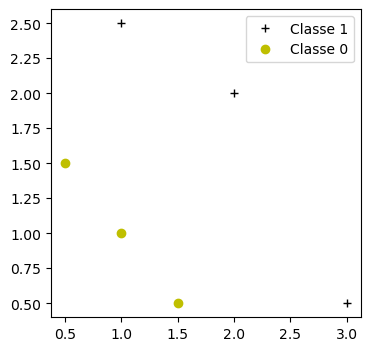

In [17]:
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

# Implementation Of Logistic_Regression From Scratch

In [60]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost

In [31]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [61]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Calcule Le Gradient pour la Regression logistique
 
    Arguments:
      X (tableau (m,n): Data, m examples avec n features
      y (tableau (m,)): valeurs à predires
      w (tableau (n,)): parametre du modele  
      b (scalaire)      : parametre du modele
    Retours
      dj_dw (tableau (n,)): Le gradient du coût par rapport au paramètre w.
      dj_db (scalaire)      : Le gradient du coût par rapport au paramètre b.
    """
    m,n = X.shape
    dj_dw=np.zeros((n,))
    dj_db=0

    for i in range (m):
        f_wb_i=sigmoid(np.dot(w,X[i])+b)
        err_i=f_wb_i-y[i]
        for j in range(n):
            dj_dw[j]+=err_i*X[i][j]
        dj_db+=err_i
    dj_dw/=m
    dj_db/=m
    return dj_db,dj_dw

In [50]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp}" )

dj_db: 0.49861806546328574
dj_dw: [0.49833339 0.49883943]


In [56]:
def gradient_descent(X, y, w_initial, b_initial, alpha, num_iters): 
    J_history = []
    w = copy.deepcopy(w_initial)  
    b = b_initial
    
    for i in range(num_iters):
        # Calcule Les Gradient et met à jour les parametres
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update les parametres en utilisant w,b les gradient et alpha
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Sauvegarde le cout J a chaque itérations
        if i<100000:     
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Affiche toutes les 10 fois à intervalles ou autant d'itérations si <10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history

In [62]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alpha = 0.1
iterations = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alpha, iterations) 
print(f"\nParameters Mis a jours: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

Parameters Mis a jours: w:[5.28123029 5.07815608], b:-14.222409982019837


In [71]:
# Fonction de prédiction
def predict(X, w, b):
    """
    Prédit les étiquettes (0 ou 1) pour les exemples dans X.
    
    Args:
        X : ndarray (m, n) - données d'entrée, m exemples avec n caractéristiques
        w : ndarray (n,) - paramètres de poids après entraînement
        b : après entraînement
        
    Returns:
        predictions : ndarray (m,) - étiquettes prédites (0 ou 1)
    """
    # Calculer les probabilités pour chaque exemple
    z = np.dot(X, w) + b
    probs = sigmoid(z)

    # Faire des prédictions en utilisant un seuil de 0.5
    predictions = probs >= 0.5
    
    # Convertir les booléens en 0 ou 1
    return predictions.astype(int)




In [72]:
# Faire des prédictions sur vos données d'entraînement
predictions_train = predict(X_train, w_out, b_out)

# Afficher les prédictions
print("Prédictions pour les données d'entraînement :")
print(predictions_train)

# Si vous voulez comparer avec les vraies étiquettes
print("\nÉtiquettes réelles :")
print(y_train)

Prédictions pour les données d'entraînement :
[0 0 0 1 1 1]

Étiquettes réelles :
[0 0 0 1 1 1]


# Utilisations De Scikit Learn 

In [65]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [67]:
y_pred = lr_model.predict(X_train)

print("Prediction on training set:", y_pred)

Prediction on training set: [0 0 0 1 1 1]


In [70]:
print("Accuracy on training set:", lr_model.score(X_train, y_train))

Accuracy on training set: 1.0
